Mean Squared Error (MSE): 33639075.08997811
Root Mean Squared Error (RMSE): 5799.92026582936
R² Score: 0.7833214205203846


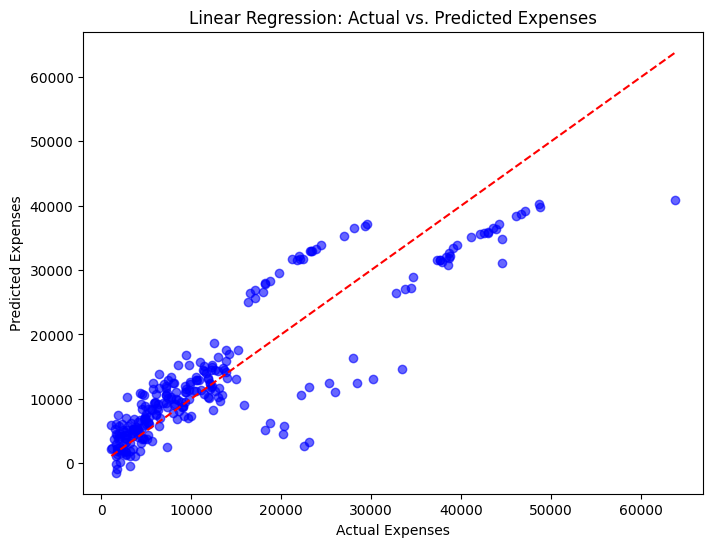

In [1]:
#Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Encode categorical variables
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Ideal fit line
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Linear Regression: Actual vs. Predicted Expenses")
plt.show()


Mean Squared Error (MSE): 20523248.981770393
Root Mean Squared Error (RMSE): 4530.259262092004
R² Score: 0.8678040813018273


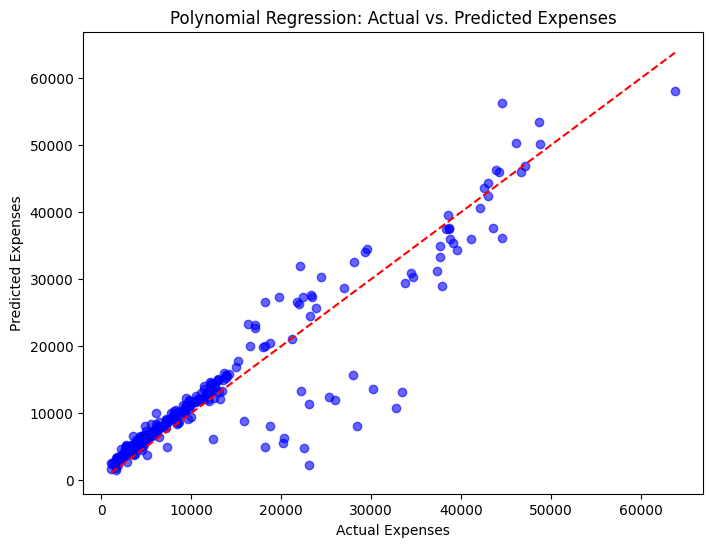

In [2]:
# Transform features using PolynomialFeatures (degree=2)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Ideal fit line
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Polynomial Regression: Actual vs. Predicted Expenses")
plt.show()


In [3]:
# Define new data
new_data = pd.DataFrame({
    'age': [30, 40],
    'sex': ['female', 'male'],
    'bmi': [28.5, 35.2],
    'children': [1, 2],
    'smoker': ['no', 'yes'],
    'region': ['southeast', 'northwest']
})

# Encode categorical variables using the same LabelEncoders from training
for col in ['sex', 'smoker', 'region']:
    new_data[col] = label_encoders[col].transform(new_data[col])  # Ensure consistency with training

# Select features in the same order as used during training
feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  # Same as training set

# Apply the same StandardScaler used during training
new_data_scaled = scaler.transform(new_data[feature_columns])  # Fix: Include all features

# Apply polynomial transformation
new_data_poly = poly.transform(new_data_scaled)

# Predict expenses using the trained polynomial model
predicted_expenses = model.predict(new_data_poly)

# Store predictions in DataFrame
new_data['Predicted Expenses'] = predicted_expenses

# Print results
print(new_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'Predicted Expenses']])


   age  sex   bmi  children  smoker  region  Predicted Expenses
0   30    0  28.5         1       0       2         5870.768307
1   40    1  35.2         2       1       1        39014.383157
